# EJERCICIO #1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def regresion_lineal_manual(dataframe):

    x = dataframe.iloc[:, 0].values
    y = dataframe.iloc[:, 1].values
    
    n = len(x)

    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x ** 2)
    sum_y2 = np.sum(y ** 2)
    
    beta1 = (sum_x * sum_y - n * sum_xy) / (sum_x ** 2 - n * sum_x2)
    beta0 = (sum_y - beta1 * sum_x) / n
    
    y_pred = beta0 + beta1 * x
    
    y_mean = np.mean(y)
    ss_total = np.sum((y - y_mean) ** 2)
    ss_reg = np.sum((y_pred - y_mean) ** 2)
    r2 = ss_reg / ss_total

    r = np.sqrt(r2)
    

    residuos = y - y_pred
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, label='Datos reales')
    plt.plot(x, y_pred, color='red', linewidth=2, label=f'Recta: y = {beta0:.4f} + {beta1:.4f}x')
    plt.xlabel(dataframe.columns[0])
    plt.ylabel(dataframe.columns[1])
    plt.title('Regresión Lineal')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return [np.array([beta0, beta1]), r2, r, residuos, plt.gcf()]



   

Resultados de la regresión lineal:
Beta0 (intercepto): 2.064
Beta1 (pendiente): 1.442
Coeficiente de determinación (r²): 0.956
Coeficiente de correlación (r): 0.978


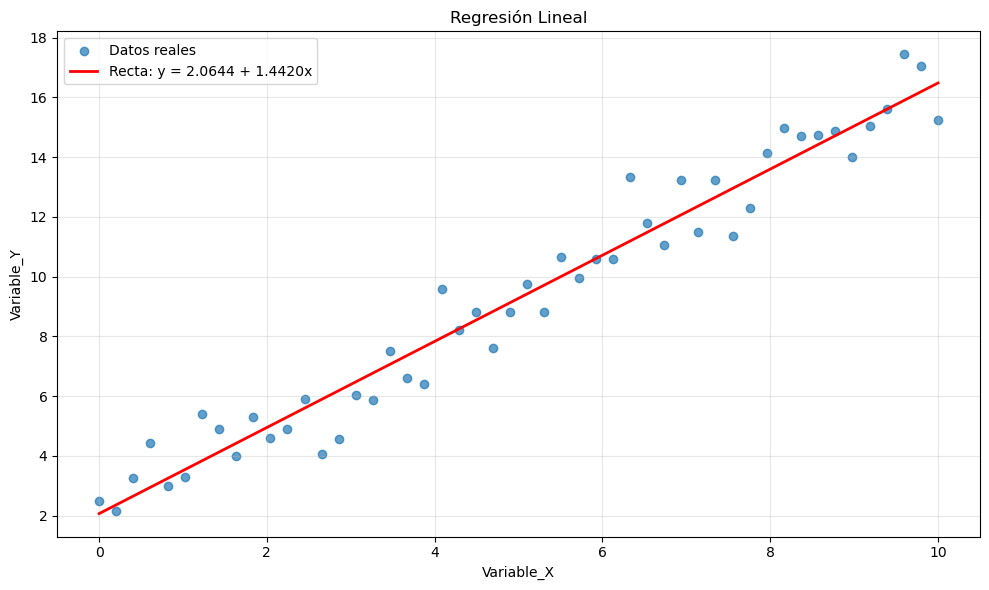

In [3]:
np.random.seed(42)
x_ejemplo = np.linspace(0, 10, 50)
y_ejemplo = 2 + 1.5 * x_ejemplo + np.random.normal(0, 1, 50)
    1
df_ejemplo = pd.DataFrame({
        'Variable_X': x_ejemplo,
        'Variable_Y': y_ejemplo
})
    
resultado = regresion_lineal_manual(df_ejemplo)
    
print("Resultados de la regresión lineal:")
print(f"Beta0 (intercepto): {resultado[0][0]:.3f}")
print(f"Beta1 (pendiente): {resultado[0][1]:.3f}")
print(f"Coeficiente de determinación (r²): {resultado[1]:.3f}")
print(f"Coeficiente de correlación (r): {resultado[2]:.3f}")
    
plt.show()

# EJERCICIO #2

Dimensiones del dataset: (768, 10)
Columnas: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']

Primeras 5 filas:
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

1. Análisis estadístico de todas las variables:
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000 

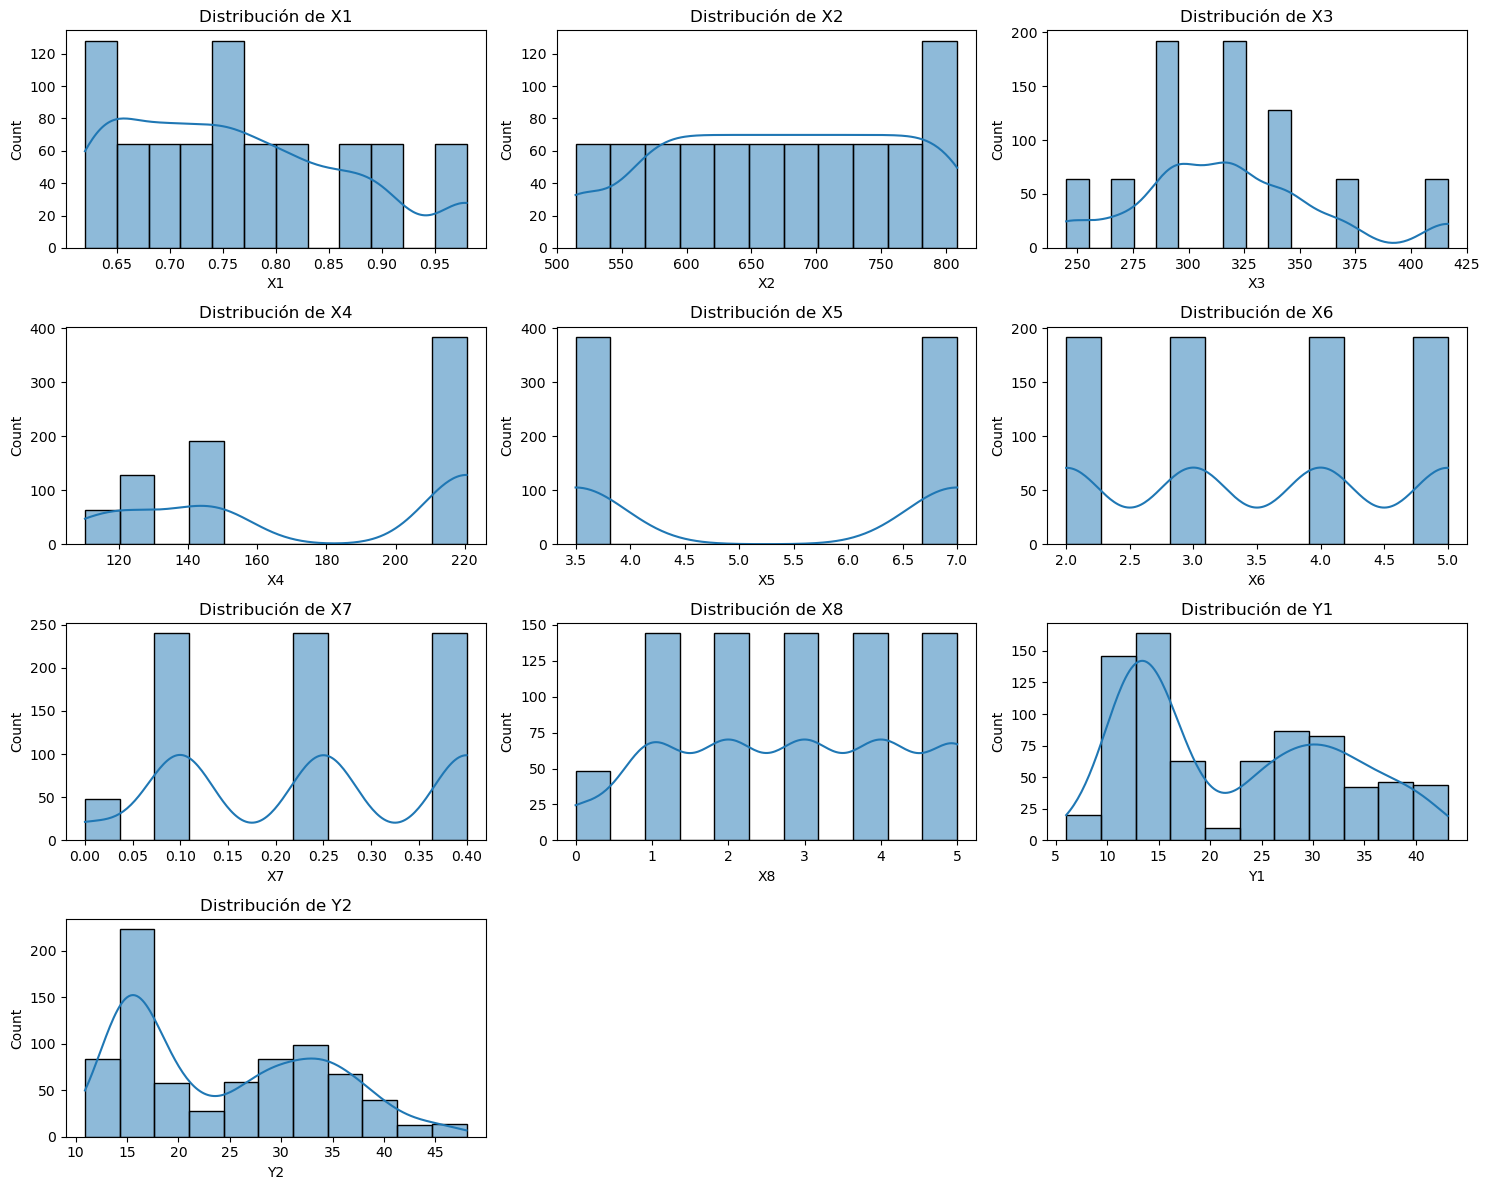


3. Matriz de correlación


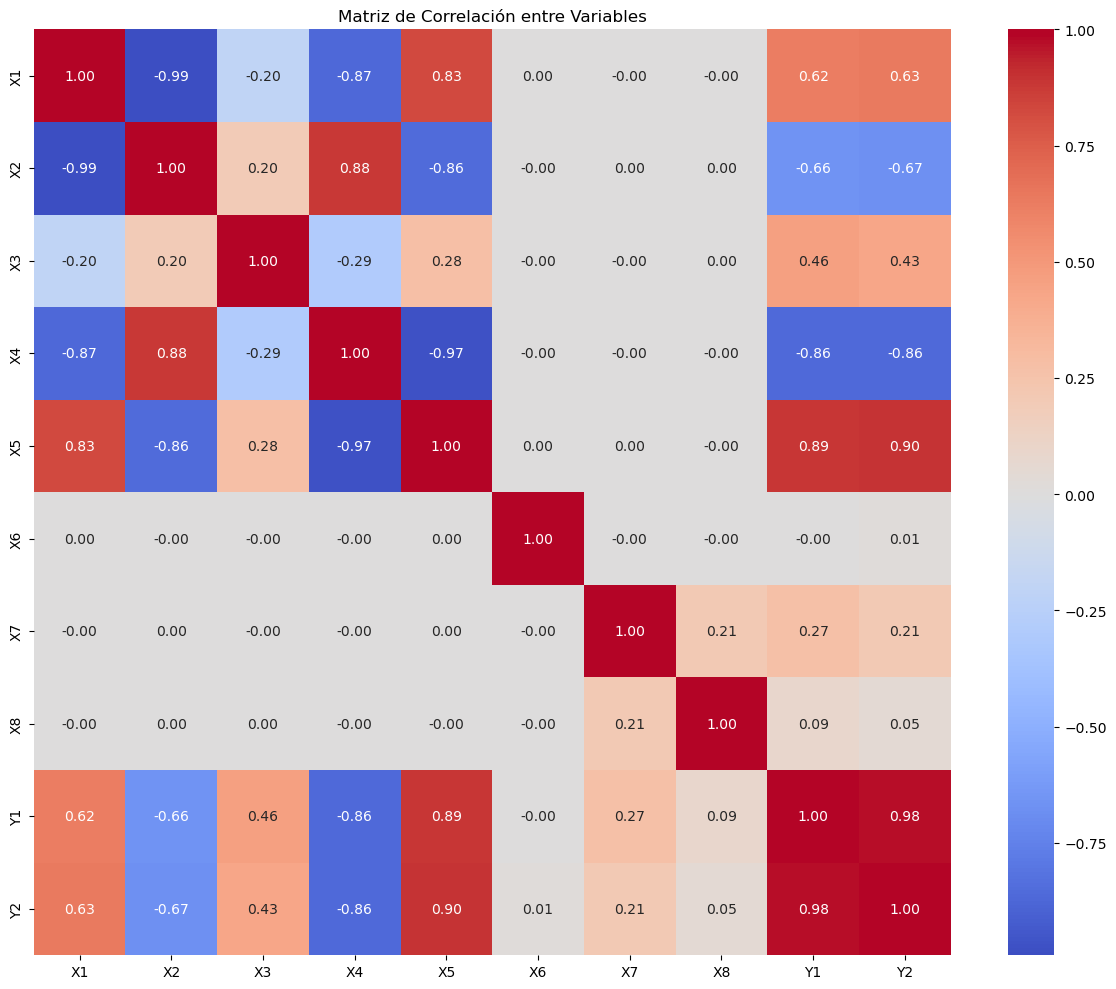


4. Comentarios sobre el análisis:
- Las variables muestran diferentes escalas y distribuciones
- La matriz de correlación ayuda a identificar relaciones entre variables
- Se observan algunas correlaciones fuertes entre variables predictoras y targets

5. Scatter plots contra Y1 - Y2


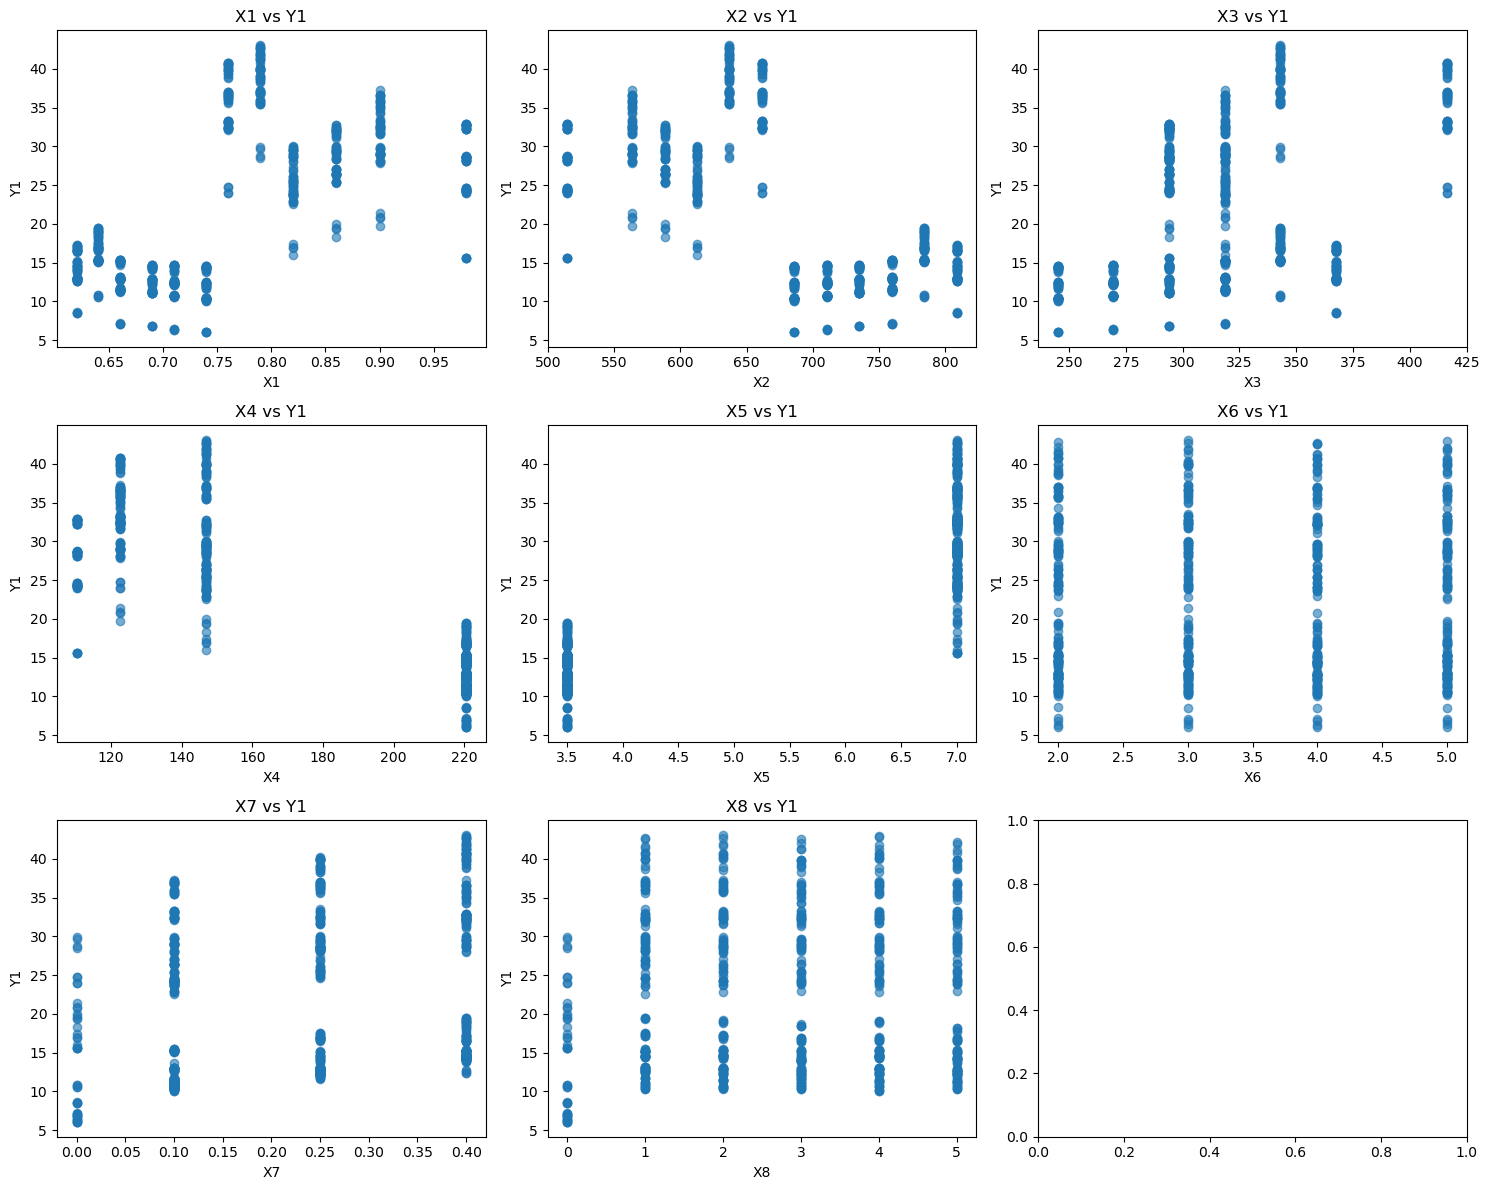

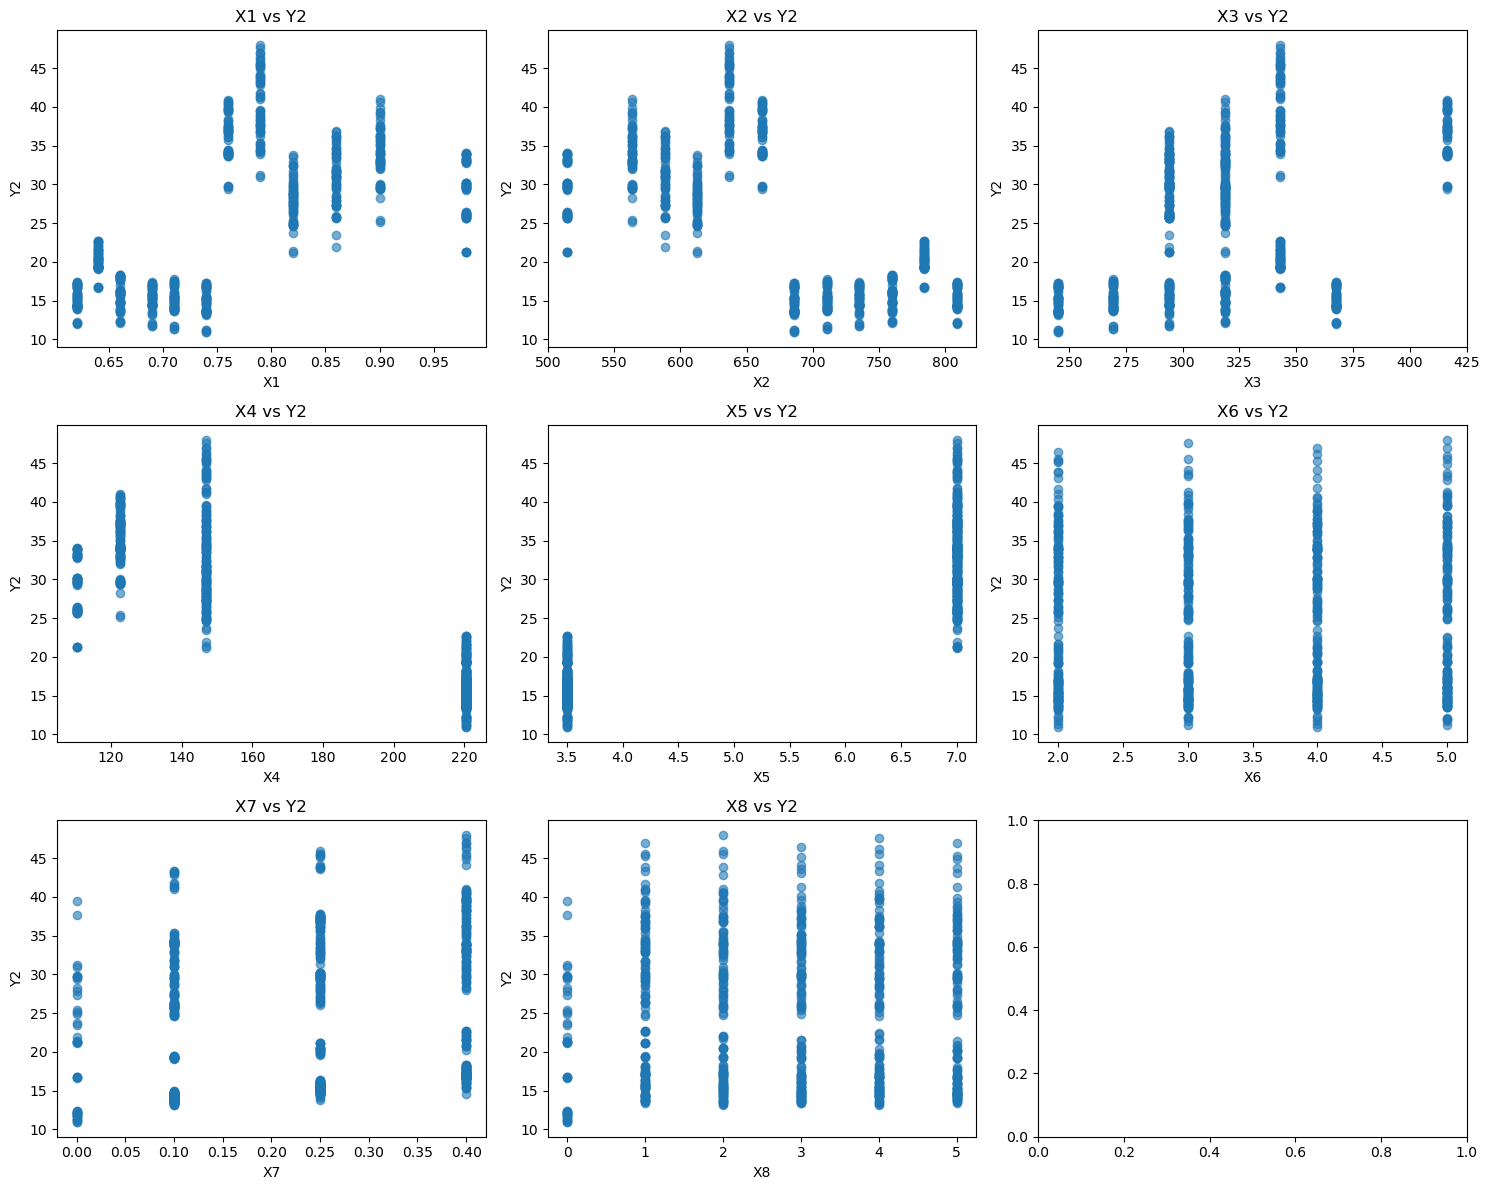


6. Particion de datos
Tamaño del conjunto de entrenamiento: (537, 8)
Tamaño del conjunto de prueba: (231, 8)

7. Configurando modelos y GridSearchCV

Evaluando modelos para Y1
  Entrenando RandomForest
    RandomForest - RMSE: 0.4867, R2: 0.9977
  Entrenando GradientBoosting
    GradientBoosting - RMSE: 0.4299, R2: 0.9982
  Entrenando SVR
    SVR - RMSE: 2.4165, R2: 0.9424
  Entrenando DecisionTree
    DecisionTree - RMSE: 0.5809, R2: 0.9967

Evaluando modelos para Y2
  Entrenando RandomForest
    RandomForest - RMSE: 1.6672, R2: 0.9692
  Entrenando GradientBoosting
    GradientBoosting - RMSE: 1.1569, R2: 0.9852
  Entrenando SVR
    SVR - RMSE: 2.6971, R2: 0.9193
  Entrenando DecisionTree
    DecisionTree - RMSE: 1.9646, R2: 0.9572

9. Resultados ordenados por RMSE:

Ranking para Y1:
1. GradientBoosting:
   RMSE: 0.4299
   R²: 0.9982
   Parámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
2. RandomForest:
   RMSE: 0.4867
   R²: 0.9977
   Parámetros: {'max_depth': N

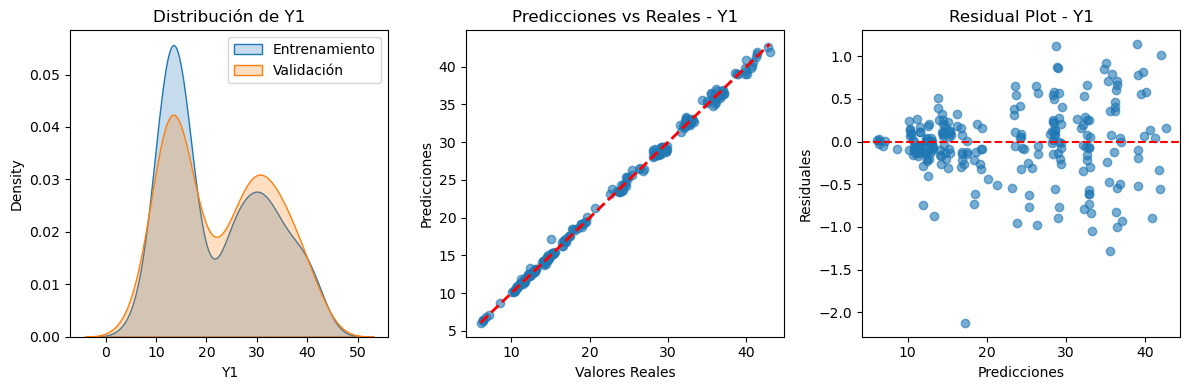


Resultados finales para Y1:
RMSE en validación: 0.4867
R² en validación: 0.9977


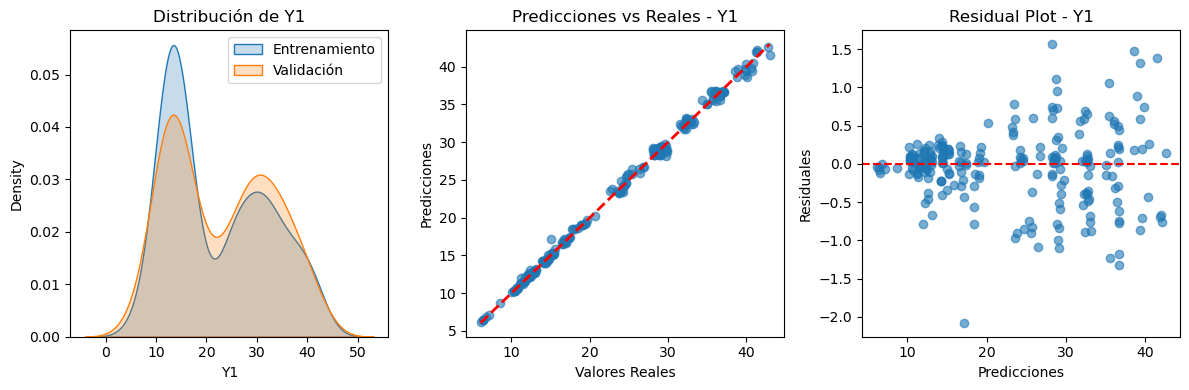


--- MODELOS PARA Y2 ---

Resultados finales para Y2:
RMSE en validación: 1.1569
R² en validación: 0.9852


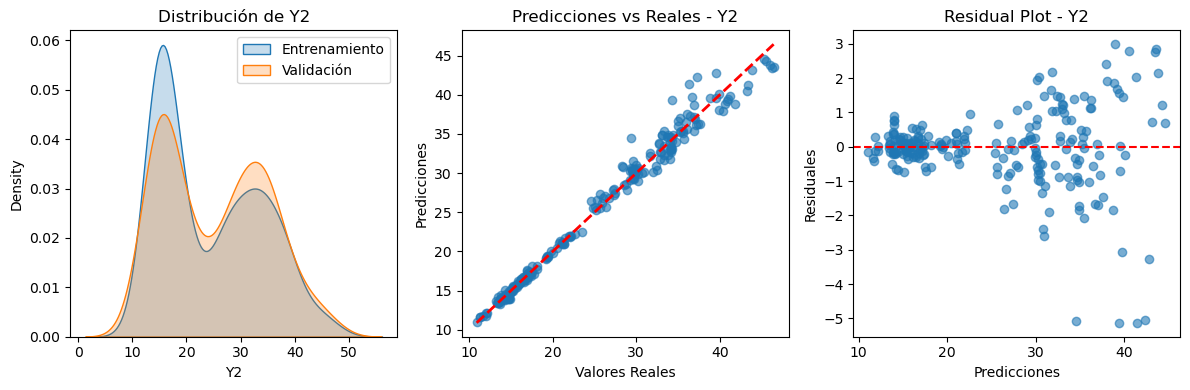


Resultados finales para Y2:
RMSE en validación: 1.6672
R² en validación: 0.9692


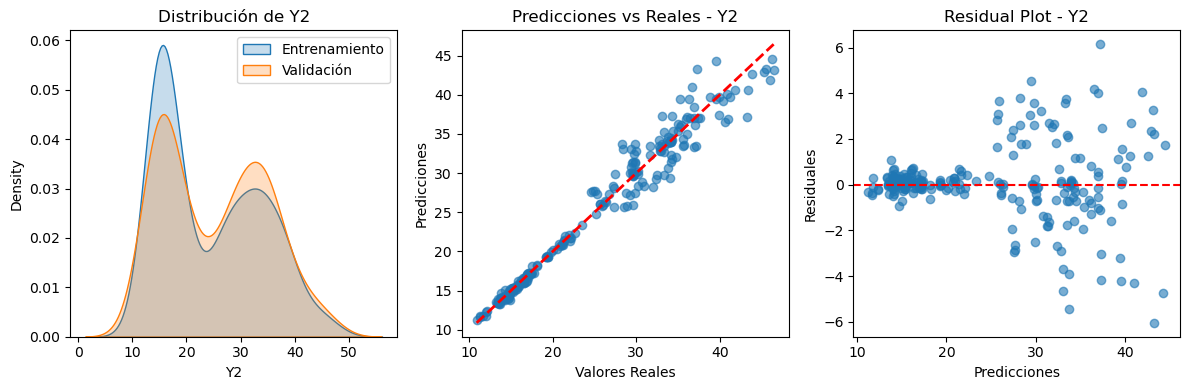

RESUMEN
CHAMPION Y1: GradientBoosting - RMSE: 0.4299
CHALLENGER Y1: RandomForest - RMSE: 0.4867
CHAMPION Y2: GradientBoosting - RMSE: 1.1569
CHALLENGER Y2: RandomForest - RMSE: 1.6672


In [6]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings


df = pd.read_excel('dataset.xlsx')

print(f"Dimensiones del dataset: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print("\nPrimeras 5 filas:")
print(df.head())


print("\n1. Análisis estadístico de todas las variables:")
print(df.describe())


print("\n2. Gráficas de densidad")
variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']

plt.figure(figsize=(15, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
plt.tight_layout()
plt.show()


print("\n3. Matriz de correlación")
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación entre Variables')
plt.tight_layout()
plt.show()


print("\n4. Comentarios sobre el análisis:")
print("- Las variables muestran diferentes escalas y distribuciones")
print("- La matriz de correlación ayuda a identificar relaciones entre variables")
print("- Se observan algunas correlaciones fuertes entre variables predictoras y targets")

print("\n5. Scatter plots contra Y1 - Y2")

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()
for i, var in enumerate(variables[:-2]):  # Excluir Y1 e Y2
    axes[i].scatter(df[var], df['Y1'], alpha=0.6)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Y1')
    axes[i].set_title(f'{var} vs Y1')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()
for i, var in enumerate(variables[:-2]):  # Excluir Y1 e Y2
    axes[i].scatter(df[var], df['Y2'], alpha=0.6)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Y2')
    axes[i].set_title(f'{var} vs Y2')
plt.tight_layout()
plt.show()

print("\n6. Particion de datos")


X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y1 = df['Y1']
y2 = df['Y2']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y1_train, y1_test = train_test_split(X_scaled, y1, test_size=0.3, random_state=42)
_, _, y2_train, y2_test = train_test_split(X_scaled, y2, test_size=0.3, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

print("\n7. Configurando modelos y GridSearchCV")

models = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

# Modelo adicional propuesto
models['DecisionTree'] = {
    'model': DecisionTreeRegressor(random_state=42),
    'params': {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    }
}

def evaluar_modelos(X_train, X_test, y_train, y_test, target_name):
    print(f"\nEvaluando modelos para {target_name}")
    resultados = []
    
    for model_name, model_config in models.items():
        print(f"  Entrenando {model_name}")
        
        grid_search = GridSearchCV(
            model_config['model'],
            model_config['params'],
            cv=10,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        
        grid_search.fit(X_train, y_train)
        
        # Mejor modelo
        best_model = grid_search.best_estimator_
        
        # Predicciones
        y_pred = best_model.predict(X_test)
        
        # Métricas
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        resultados.append({
            'Modelo': model_name,
            'RMSE': rmse,
            'R2': r2,
            'Mejores Parámetros': grid_search.best_params_
        })
        
        print(f"    {model_name} - RMSE: {rmse:.4f}, R2: {r2:.4f}")
    
    return resultados


resultados_y1 = evaluar_modelos(X_train, X_test, y1_train, y1_test, "Y1")


resultados_y2 = evaluar_modelos(X_train, X_test, y2_train, y2_test, "Y2")


print("\n9. Resultados ordenados por RMSE:")

def ordenar_resultados(resultados, target_name):
    resultados_ordenados = sorted(resultados, key=lambda x: x['RMSE'])
    
    print(f"\nRanking para {target_name}:")
    for i, resultado in enumerate(resultados_ordenados, 1):
        print(f"{i}. {resultado['Modelo']}:")
        print(f"   RMSE: {resultado['RMSE']:.4f}")
        print(f"   R²: {resultado['R2']:.4f}")
        print(f"   Parámetros: {resultado['Mejores Parámetros']}")
    
    return resultados_ordenados

resultados_y1_ordenados = ordenar_resultados(resultados_y1, "Y1")
resultados_y2_ordenados = ordenar_resultados(resultados_y2, "Y2")

print("\n10. Identificando Champion y Challenger...")

def identificar_champion_challenger(resultados_ordenados, target_name):
    champion = resultados_ordenados[0]
    challenger = resultados_ordenados[1]
    
    print(f"\nPara {target_name}:")
    print(f"CHAMPION: {champion['Modelo']} (RMSE: {champion['RMSE']:.4f})")
    print(f"CHALLENGER: {challenger['Modelo']} (RMSE: {challenger['RMSE']:.4f})")
    
    return champion, challenger

champion_y1, challenger_y1 = identificar_champion_challenger(resultados_y1_ordenados, "Y1")
champion_y2, challenger_y2 = identificar_champion_challenger(resultados_y2_ordenados, "Y2")


print("\n11. Entrenando modelos finales")

def entrenar_y_evaluar_modelo_final(model_config, best_params, X_train, y_train, X_test, y_test, target_name):
    # Entrenar modelo con todos los datos de entrenamiento
    modelo_final = model_config['model']
    modelo_final.set_params(**best_params)
    modelo_final.fit(X_train, y_train)
    
    # Predicciones
    y_pred = modelo_final.predict(X_test)
    
    # Métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nResultados finales para {target_name}:")
    print(f"RMSE en validación: {rmse:.4f}")
    print(f"R² en validación: {r2:.4f}")
    
    # Gráfica de densidad
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    sns.kdeplot(y_train, label='Entrenamiento', fill=True)
    sns.kdeplot(y_test, label='Validación', fill=True)
    plt.title(f'Distribución de {target_name}')
    plt.legend()
    
    # Scatter plot predicciones vs observaciones
    plt.subplot(1, 3, 2)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Predicciones vs Reales - {target_name}')
    
    # Residual plot
    plt.subplot(1, 3, 3)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuales')
    plt.title(f'Residual Plot - {target_name}')
    
    plt.tight_layout()
    plt.show()
    
    return rmse, r2

# Entrenar y evaluar modelos para Y1
print("\n--- MODELOS PARA Y1 ---")
rmse_champion_y1, r2_champion_y1 = entrenar_y_evaluar_modelo_final(
    models[champion_y1['Modelo']],
    champion_y1['Mejores Parámetros'],
    X_train, y1_train, X_test, y1_test, "Y1"
)

rmse_challenger_y1, r2_challenger_y1 = entrenar_y_evaluar_modelo_final(
    models[challenger_y1['Modelo']],
    challenger_y1['Mejores Parámetros'],
    X_train, y1_train, X_test, y1_test, "Y1"
)

# Entrenar y evaluar modelos para Y2
print("\n--- MODELOS PARA Y2 ---")
rmse_champion_y2, r2_champion_y2 = entrenar_y_evaluar_modelo_final(
    models[champion_y2['Modelo']],
    champion_y2['Mejores Parámetros'],
    X_train, y2_train, X_test, y2_test, "Y2"
)

rmse_challenger_y2, r2_challenger_y2 = entrenar_y_evaluar_modelo_final(
    models[challenger_y2['Modelo']],
    challenger_y2['Mejores Parámetros'],
    X_train, y2_train, X_test, y2_test, "Y2"
)

print("RESUMEN")
print(f"CHAMPION Y1: {champion_y1['Modelo']} - RMSE: {rmse_champion_y1:.4f}")
print(f"CHALLENGER Y1: {challenger_y1['Modelo']} - RMSE: {rmse_challenger_y1:.4f}")
print(f"CHAMPION Y2: {champion_y2['Modelo']} - RMSE: {rmse_champion_y2:.4f}")
print(f"CHALLENGER Y2: {challenger_y2['Modelo']} - RMSE: {rmse_challenger_y2:.4f}")
